# Anomalías

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
img01=cv.imread('../cochesVarias/Cars296.png',cv.IMREAD_GRAYSCALE)
img02=cv.imread('../cochesVarias/Cars208.png')

## Ruido sal y pimienta

Este tipo de ruido puede ser causado por interferencias en la transmisión de la imagen o errores en los sensores de la cámara, y es conocido por tener píxeles de color negro (sal) y blanco (pimienta).

In [4]:
print(*img01.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

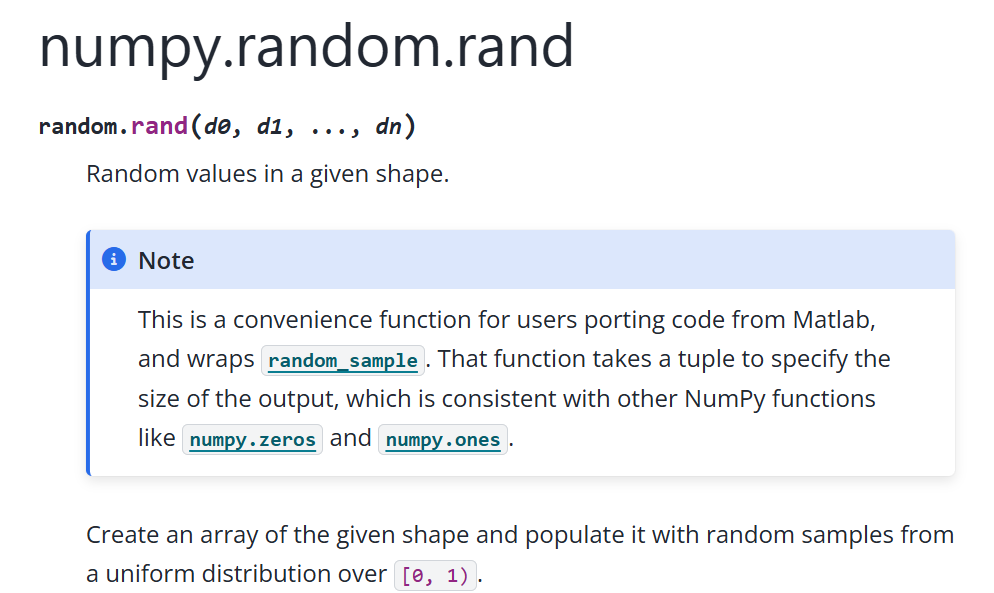

In [66]:
probabilidad=0.15
#este proceso se puede hacer para imágenes a color o en niveles de gris
img_con_ruido = img01.copy()
#img_con_ruido = img02.copy()

In [67]:
ruido = np.random.rand(*img01.shape)  
#ruido = np.random.rand(img01.shape[0],img01.shape[1])   

In [68]:
ruido

array([[0.30534933, 0.91660778, 0.47797131, ..., 0.38513304, 0.21750407,
        0.97319145],
       [0.53197999, 0.7931472 , 0.3175207 , ..., 0.97001788, 0.84569716,
        0.54159836],
       [0.18473608, 0.19995648, 0.08532118, ..., 0.92577672, 0.19352471,
        0.11045103],
       ...,
       [0.32419615, 0.93635326, 0.69608759, ..., 0.53999484, 0.9342252 ,
        0.04216585],
       [0.52124472, 0.81759123, 0.79588273, ..., 0.64397944, 0.09215124,
        0.50452366],
       [0.77002939, 0.30050181, 0.92884143, ..., 0.53726891, 0.9404052 ,
        0.31741586]])

In [72]:
# Agregar "sal" (pixeles con valor 255) a los píxeles de la imagen
img_con_ruido[ruido < probabilidad/2] = 255  # Sal (blanco)
    
# Agregar "pimienta" (pixeles con valor 0) a los píxeles de la imagen
img_con_ruido[ruido > 1-probabilidad/2] = 0  # Pimienta (negro)
    



In [73]:
ruido<probabilidad

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

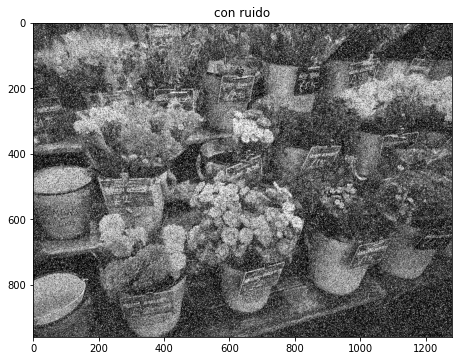

In [74]:
imshow("con ruido",img_con_ruido)